# Demo: Sampling with LoRA in Diffusion Models

Sample with vanilla Stable Diffusion.

In [1]:
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler, StableDiffusionImg2ImgPipeline
import torch

model_id = "../stable-diffusion/stable-diffusion-1-5"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda"
)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

# necessary for outputing attack performance
def dummy(images, **kwargs):
    return images, [False] * images.shape[0]
pipe.safety_checker = dummy 

prompt = "a photo of a sks person, high quality, masterpiece"
torch.manual_seed(0)
image = pipe(prompt, num_inference_steps=50, guidance_scale=7).images[0]

image  # nice. diffusers are cool.

/home/caradryan/programs/anaconda3/envs/mist-v2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/caradryan/programs/anaconda3/envs/mist-v2/lib/python3.10/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]


RuntimeError: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero.

Sample with LoRA in Stable Diffusion

100%|██████████| 25/25 [00:02<00:00, 10.79it/s]


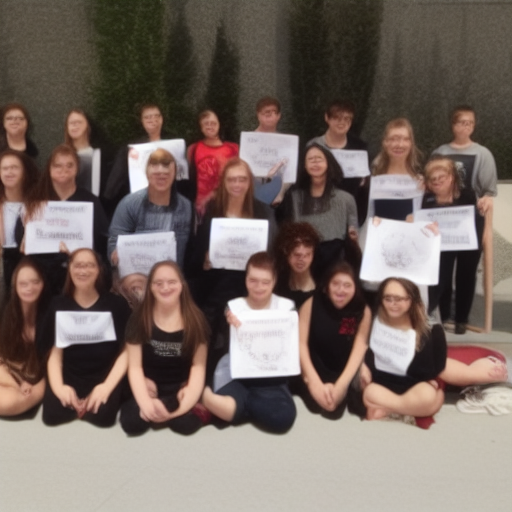

In [4]:
# lora_model_path = '../output/lora/sd1-5_adv/pytorch_lora_weights.safetensors'
lora_model_path = '../output/lora/sd1-5/pytorch_lora_weights.safetensors'
pipe.unet.load_attn_procs(lora_model_path)

pipe.to("cuda")
# use half the weights from the LoRA finetuned model and half the weights from the base model
torch.manual_seed(1234)
image = pipe(

    "a photo of a sks person, high quality, masterpiece", num_inference_steps=25, guidance_scale=7.5, cross_attention_kwargs={"scale": 1.0}

).images[0]
# use the weights from the fully finetuned LoRA model

image.save("lora_sample.png")

image